In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

In [2]:
def setup_class(parameter):
    """
    It sets up the CLASS code with the given cosmological parameter.
    """
    c = Class()
    c.set(parameter)
    return c

In [3]:
def get_lensed_cl(c, l):
    """
    It runs the CLASS code and aceessess the lensed cl until lmax=2500.
    """
    c.compute()
    cls = c.lensed_cl(l)
    return cls

In [4]:
def plot_tt_cmb_spectrum(c, l=2500, xscale='log', yscale='linear', T_cmb=2.72548):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is TT power spectrum, i.e. temperature anisotropies.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clTT = cls['tt'][2:]
    plt.figure()
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlim(ll[0], ll[-1])
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi] C_\ell^\mathrm{TT}$  [$\mu$K$^2$]')
    plt.title("CMB angular power spectrum (TT)")

    # clTT*ll*(ll+1)/2./np.pi is dimensionless. To make it in units of K^2, we scale it with T_cmb.
    # x-axis = multipole moment, y-axis = power per ln(l), in units of K^2
    T_cmb_uK = T_cmb*1e6
    plt.plot(ll, clTT*ll*(ll+1)/2./np.pi*T_cmb_uK**2, 'r-')

In [5]:
def plot_te_cmb_spectrum(c, l=2000, xscale='log', T_cmb=2.72548):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is TE power spectrum, i.e. temperature-polarization cross-correlation.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clTE = cls['te'][2:]

    # clTE*ll*(ll+1)/2./np.pi is dimensionless. To make it in units of K^2, we scale it with T_cmb.
    T_cmb_uK = T_cmb*1e6
    scaled_clTE = clTE*ll*(ll+1)/2./np.pi*T_cmb_uK**2

    fig, ax1 = plt.subplots()

    ax1.set_xscale(xscale)
    ax1.set_xlim(ll[0], ll[-1])
    ax1.set_xlabel(r'$\ell$')
    ax1.set_ylabel(r'$[\ell(\ell+1)/2\pi] C_\ell^\mathrm{TE}$  [$\mu$K$^2$]', color='tab:blue')

    # Split the data at l = 30
    ll1 = ll[ll <= 30]
    ll2 = ll[ll > 30]
    scaled_clTE1 = scaled_clTE[ll <= 30]
    scaled_clTE2 = scaled_clTE[ll > 30]

    ax1.plot(ll1, scaled_clTE1, 'b-')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(ll2, scaled_clTE2, 'r-')  # we already handled the x-label with ax1
    ax2.set_ylabel('second scale', color='tab:red')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y', labelcolor='tab:red')
    plt.title("CMB angular power spectrum (TE)") # Set the title of the plot
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [6]:
def plot_ee_cmb_spectrum(c, l=2000, xscale='log', T_cmb=2.72548):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is EE power spectrum, i.e. polarization-polarization.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clEE = cls['ee'][2:]

    # clEE is dimensionless. To make it in units of K^2, we scale it with T_cmb.
    T_cmb_uK = T_cmb*1e6
    scaled_clEE = clEE*T_cmb_uK**2

    # Split the data at l = 30
    ll1 = ll[ll <= 30]
    ll2 = ll[ll > 30]
    scaled_clEE1 = scaled_clEE[ll <= 30]
    scaled_clEE2 = scaled_clEE[ll > 30]

    fig, ax1 = plt.subplots()

    ax1.set_xscale(xscale)
    ax1.set_xlim(ll[0], ll[-1])
    ax1.set_xlabel(r'$\ell$')
    ax1.set_ylabel(r'$C_\ell^\mathrm{EE}$  [$\mu$K$^2$]', color='tab:blue')

    ax1.plot(ll1, scaled_clEE1, 'b-')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(ll2, scaled_clEE2, 'r-')  # we already handled the x-label with ax1
    ax2.set_ylabel('second scale', color='tab:red')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y', labelcolor='tab:red')
    plt.title("CMB angular power spectrum (EE)") # Set the title of the plot
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [7]:
def plot_lensing_cmb_spectrum(c, l=2500, xscale='log', yscale='linear'):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is lensing power spectrum.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clPP = cls['pp'][2:]

    plt.figure()
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlim(ll[0], ll[-1])
    plt.xlabel(r'$L$')
    plt.ylabel(r'$[[\ell(\ell+1)]^2/2\pi] C_\ell^\mathrm{PP}$  [$10^{-7}$]')
    plt.plot(ll, clPP*(ll*(ll+1))**2/2./np.pi, 'r-')
    plt.title("CMB angular power spectrum (lensing)")


In [8]:
def plot_matter_spectrum(c):
    """
    It plots the Matter power spectrum.
    """
    kk = np.logspace(-4, np.log10(3), 1000)
    Pk = []
    for k in kk:
        Pk.append(c.pk(k, 0.))
    plt.figure()
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(kk[0], kk[-1])
    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    plt.title("Matter power spectrum")
    plt.plot(kk, Pk, 'b-')

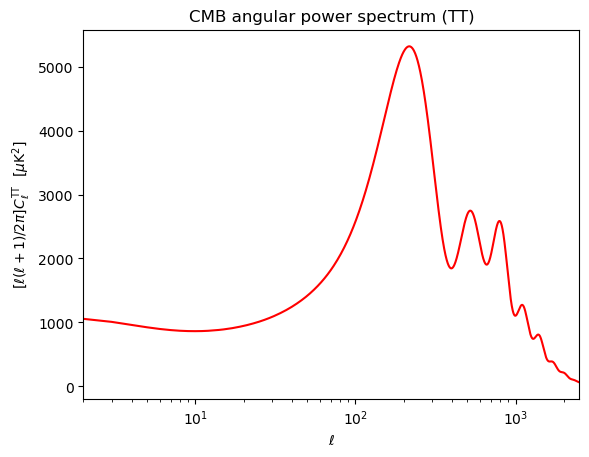

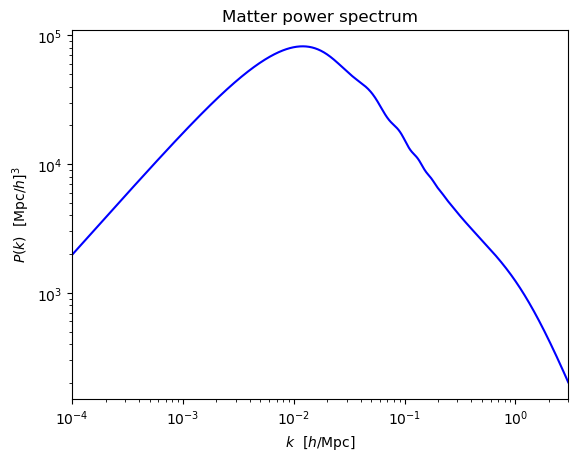

In [9]:
# Reproduce the result from tutorials (test)
example_params={
"T_cmb":2.7255,
"h":0.67,
"Omega_b":0.04,
"Omega_cdm":0.3,
"reio_parametrization": "reio_camb",
"z_reio":9,
"P_k_ini type": "analytic_Pk",
"A_s": 2.2e-9,
"n_s": 0.96,
"lensing": "yes",
"non linear": "halofit",
"output": "tCl,pCl,lCl,mPk",
"modes":"s",
"P_k_max_1/Mpc":3.0
}
example = setup_class(example_params)
plot_tt_cmb_spectrum(example)
plot_matter_spectrum(example)

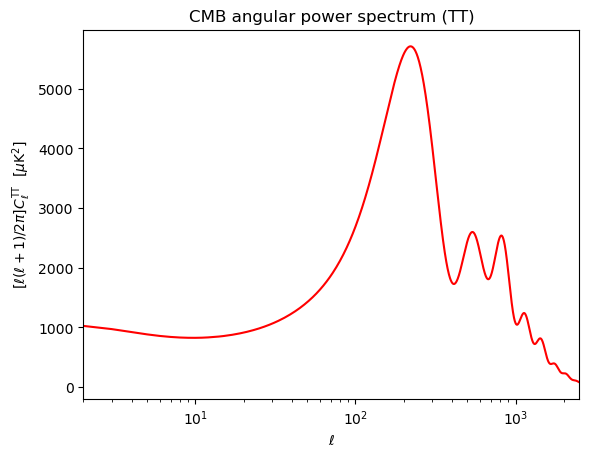

In [10]:
# Cold dark matter model from paper: Planck Sattellite Planck 2018; arXiv:1807.06211
# Want to reproduce the four plots in Fig. 1

# Data from TT+lowE
params_cold_TT = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1206,
    "omega_b": 0.02212, 
    "H0": 66.88, 
    "A_s": np.exp(3.040)/10**10, #ln10^{10}A_s=3.040
    "n_s": 0.9626,
    "tau_reio": 0.0522,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}
cold_TT = setup_class(params_cold_TT)
plot_tt_cmb_spectrum(cold_TT)

# Question: Use data from TT+lowE or TT,TE,EE+lowE+lensing?
# Do comparisons later

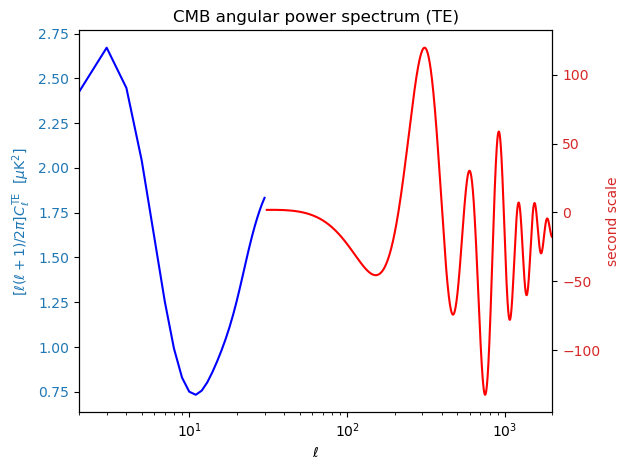

In [11]:
# Data from TE+lowE

# Divide into two parts: l<30, and 200>l>30
params_cold_TE = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1177,
    "omega_b": 0.02249, 
    "H0": 68.44, 
    "A_s": np.exp(3.018)/10**10, #ln10^{10}A_s=3.018
    "n_s": 0.967,
    "tau_reio": 0.0496,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}

cold_TE = setup_class(params_cold_TE)
plot_te_cmb_spectrum(cold_TE)


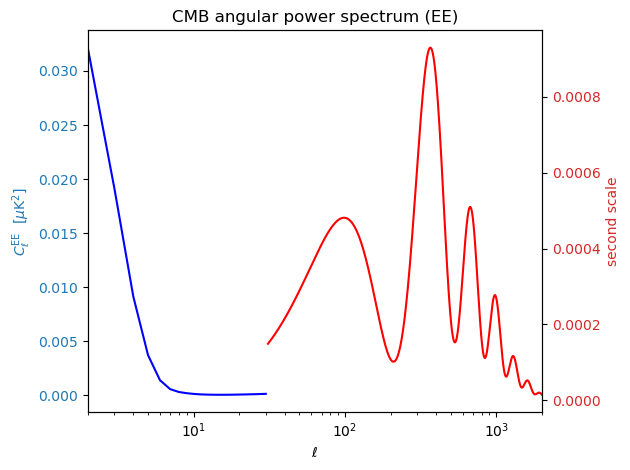

In [12]:
# Data from EE+lowE

# Divide into two parts: l<30, and 200>l>30
params_cold_EE = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1158,
    "omega_b": 0.0240, 
    "H0": 69.9, 
    "A_s": np.exp(3.052)/10**10, #ln10^{10}A_s=3.052
    "n_s": 0.980,
    "tau_reio": 0.0527,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}

cold_EE = setup_class(params_cold_EE)
plot_ee_cmb_spectrum(cold_EE)

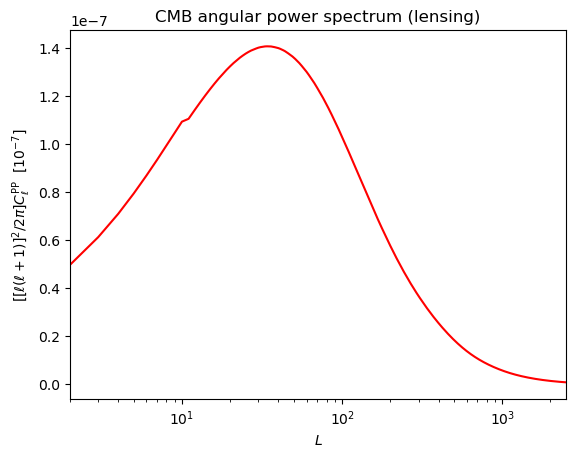

In [13]:
# Data from TT+TE+EE+lowE+lensing
params_cold_lensing = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1200,
    "omega_b": 0.02237, 
    "H0": 67.36, 
    "A_s": np.exp(3.044)/10**10, #ln10^{10}A_s=3.044
    "n_s": 0.9649,
    "tau_reio": 0.0544,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}
cold_lensing = setup_class(params_cold_lensing)
plot_lensing_cmb_spectrum(cold_lensing)

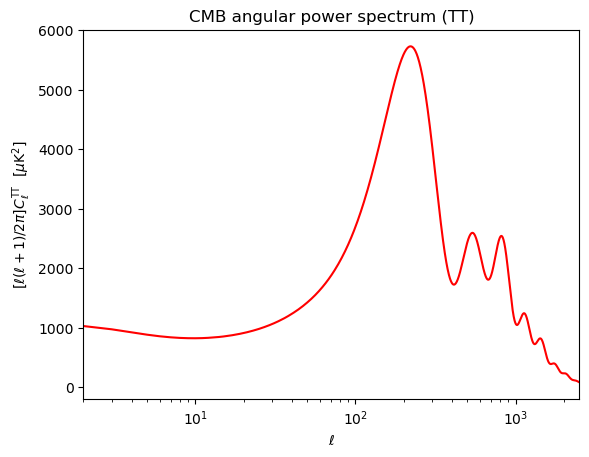

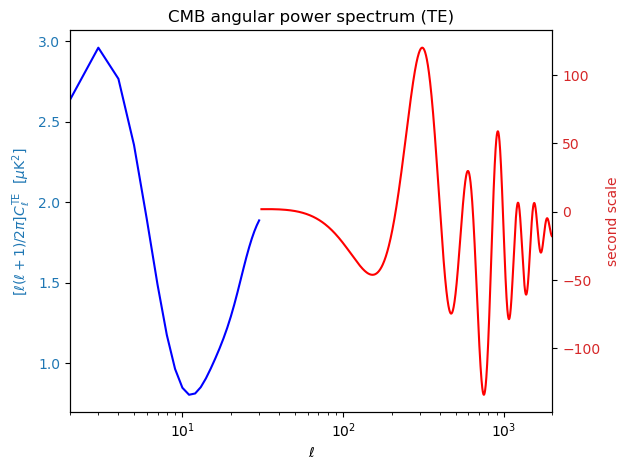

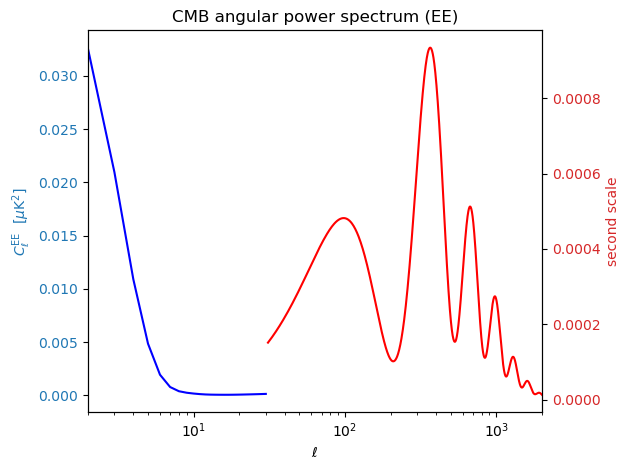

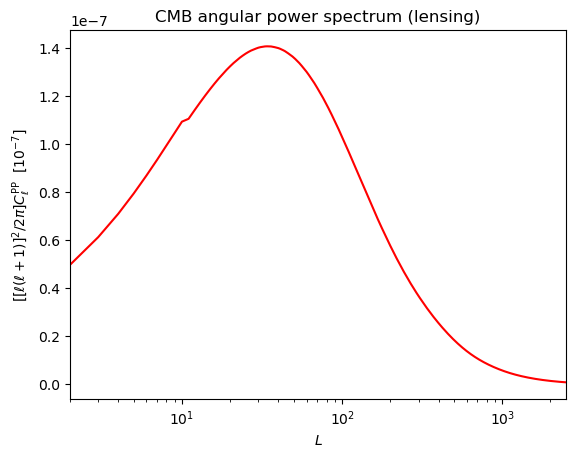

In [14]:
# Use TT,TE,EE+lowE+lensing

# TT
plot_tt_cmb_spectrum(cold_lensing)
# TE
plot_te_cmb_spectrum(cold_lensing)
# EE
plot_ee_cmb_spectrum(cold_lensing)
# Lensing
plot_lensing_cmb_spectrum(cold_lensing)


Notice the "discontinuity" at l=30 for TE and EE. 

The discontinuity at l=30 is likely due to the transition from the large angular scale (low l) to small angular scale (high l) regime. The large angular scale (l<30) Cosmic Microwave Background (CMB) polarization is dominated by the so-called reionization bump. This is the result of Thomson scattering of CMB photons off free electrons created by the reionization of hydrogen in the intergalactic medium at late times in the history of the Universe (z ~ 10), which leads to the large-angle polarization pattern.

On the other hand, the small angular scale (l>30) CMB polarization is mainly due to the acoustic oscillations in the photon-baryon fluid at the last scattering surface (z ~ 1100), which is much earlier than the epoch of reionization.

Therefore, it's quite normal to see a transition at around l=30 in the CMB polarization spectra (both TE and EE), which is not actually a discontinuity, but rather a transition between two different physical mechanisms.

However, keep in mind that the specific choice of l=30 as the transition point is somewhat arbitrary. It could be slightly higher or lower depending on the specifics of the cosmological model and the precision of the measurements.

Also, sometimes, the data processing or plotting routines might artificially introduce some apparent discontinuity. Always make sure that it is not due to some artifacts of the tools you are using.

Next step: To analyze how different parameters might change power spectrum. 

1. The spectral index, n_s: The spectral index describes the initial power spectrum of fluctuations, with n_s = 1 corresponding to a scale-invariant spectrum (as predicted by the simplest inflationary models). Deviations from 1 indicate a scale dependence to the primordial power spectrum. If n_s > 1, there is more power on small scales, and if n_s < 1, there is more power on large scales.

2. The amplitude of fluctuations, A_s: This parameter represents the amplitude of the primordial power spectrum of fluctuations. A higher value of A_s leads to larger temperature anisotropies in the CMB.

3. The baryon density, ω_b: The amount of baryonic matter influences the acoustic oscillations in the photon-baryon fluid before recombination. More baryons make the potential wells deeper, leading to a higher first peak in the CMB power spectrum and affecting the relative heights of the peaks.

4. The dark matter density, ω_cdm: Dark matter also influences the height of the peaks in the power spectrum, because it contributes to the overall matter density and therefore the gravitational potential wells.

5. The Hubble constant, H0: The Hubble constant influences the size of the sound horizon at recombination, and hence the angular scale (i.e., the position in l) of the peaks of the power spectrum.

6. The reionization optical depth, τ: Early star formation in the universe can ionize the hydrogen in the intergalactic medium, leading to a process known as reionization. This introduces an additional source of photon scattering, which suppresses the power spectrum at large scales (small l).